### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1070]:
#Student Name : Makarand More

#### 1. Import the necessary packages - 2.5 marks

In [1160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [1161]:
UR_Data=pd.read_csv('Data.CSV') # Import user ratings, the dataset file named 'Data.csv'
Movie_Data=pd.read_csv('item.csv') # Import movies info, the dataset file named 'item.csv'
User_Data=pd.read_csv('user.csv') # Import user info, the dataset file named 'user.csv'

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [1162]:
#1st shape, info, describe and find missing values for UR_Data i.e for Data.csv
UR_Data.shape

(100000, 4)

In [1163]:
UR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [1164]:
UR_Data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [1165]:
print(UR_Data.isnull().sum()) #missing value count in dataframe for each column
print('')
UR_Data.isnull().sum().sum() #missing value count in dataframe for both row and column



user id      0
movie id     0
rating       0
timestamp    0
dtype: int64



0

In [1166]:
#1st shape, info, describe and find missing values for Movie_Data i.e for item.csv
Movie_Data.shape

(1681, 22)

In [1167]:
Movie_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [1168]:
Movie_Data.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1169]:
print(Movie_Data.isnull().sum()) #missing value count in dataframe for each column
print('')
Movie_Data.isnull().sum().sum() #missing value count in dataframe for both row and column

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64



0

In [1170]:
#1st shape, info, describe and find missing values for User_Data i.e for user.csv
User_Data.shape

(943, 5)

In [1171]:
User_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [1172]:
User_Data.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [1173]:
print(User_Data.isnull().sum()) #missing value count in dataframe for each column
print('')
User_Data.isnull().sum().sum() #missing value count in dataframe for both row and column

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64



0

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [1229]:
# use sum on the default axis
Movie_Data.sum() # or we can mentioned axis=0, which is default


movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 5 marks

In [1175]:
#hint: use sum on the axis = 1
#Option 1 
Movie_Data_Result= Movie_Data[Movie_Data.iloc[:,2:].sum(axis=1)>1]
Movie_Data_Result['movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [1176]:
#option 1 using drop
Movie_Data.drop(Movie_Data.loc[Movie_Data.unknown == 1].index,inplace=False)  #not deleting permantely with inplace=False
#option 2 using simple filter to exclude data
#Movie_Data1=Movie_Data[Movie_Data.unknown == 0]
#Movie_Data1


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [1177]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [1178]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


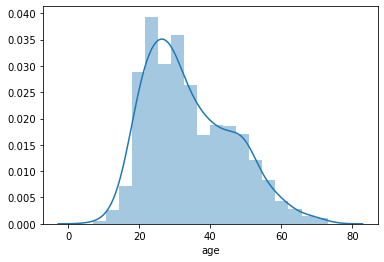

In [1179]:
#your answers here
sns.distplot(User_Data['age']) #creating displot for Age as per 1st Hint

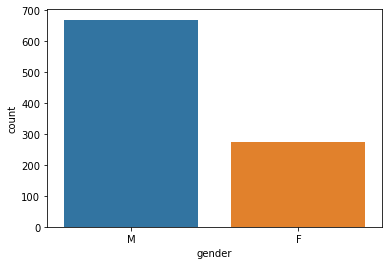

In [1180]:
sns.countplot(User_Data['gender']) #creating countplot for gender as per 1st Hint

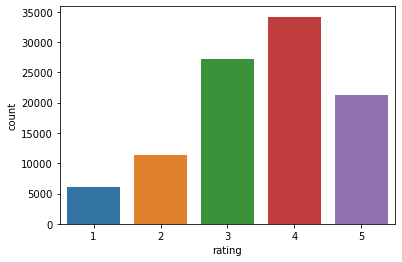

In [1181]:
sns.countplot(UR_Data['rating']) #creating countplot for rating as per 1st Hint

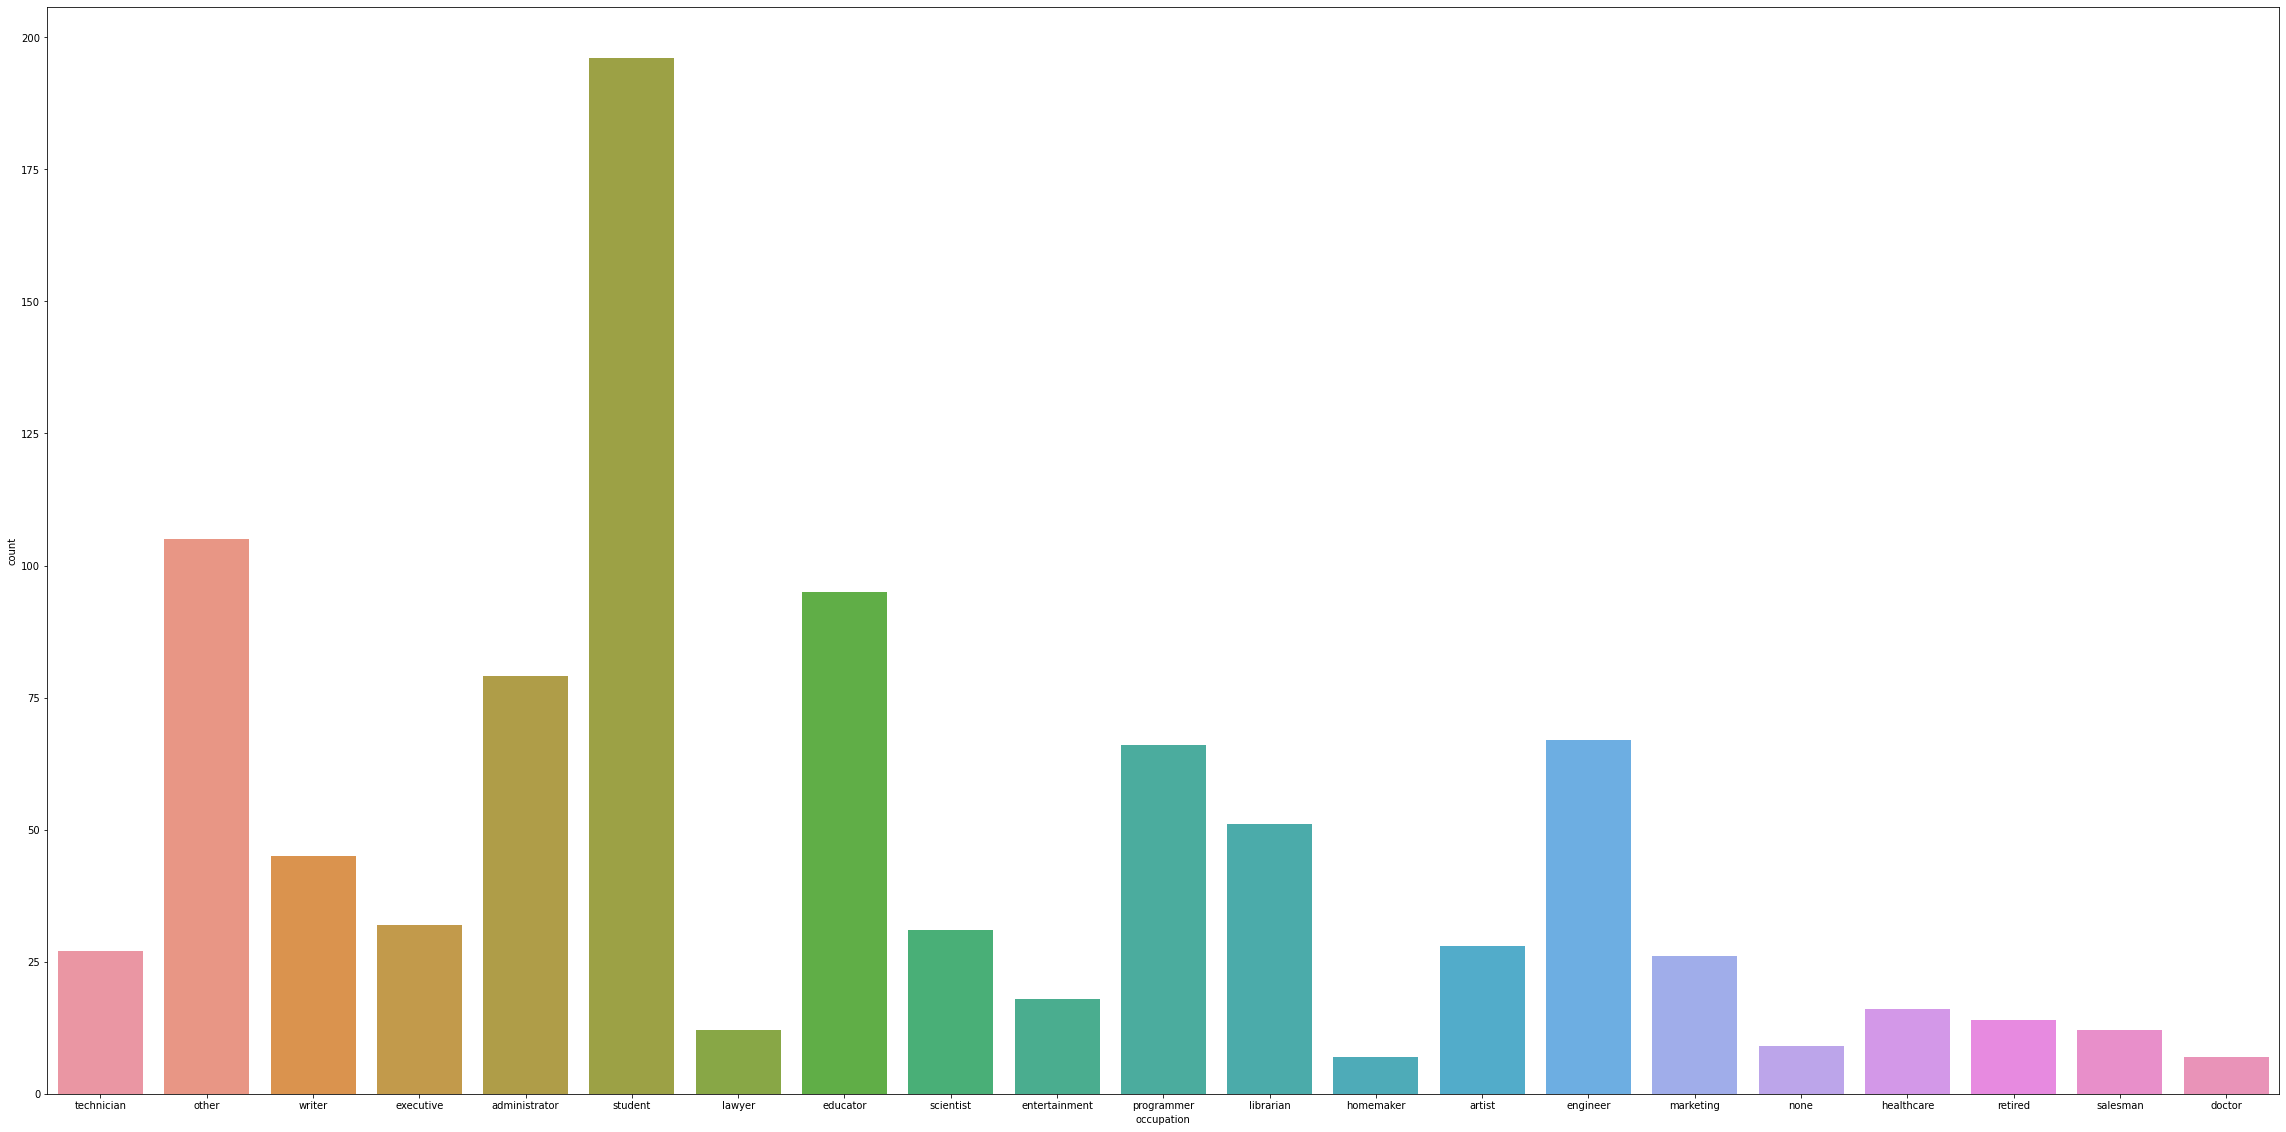

In [1200]:
plt.figure(figsize=(40,20))
sns.countplot(User_Data['occupation']) #creating countplot for occupation as per 1st Hint

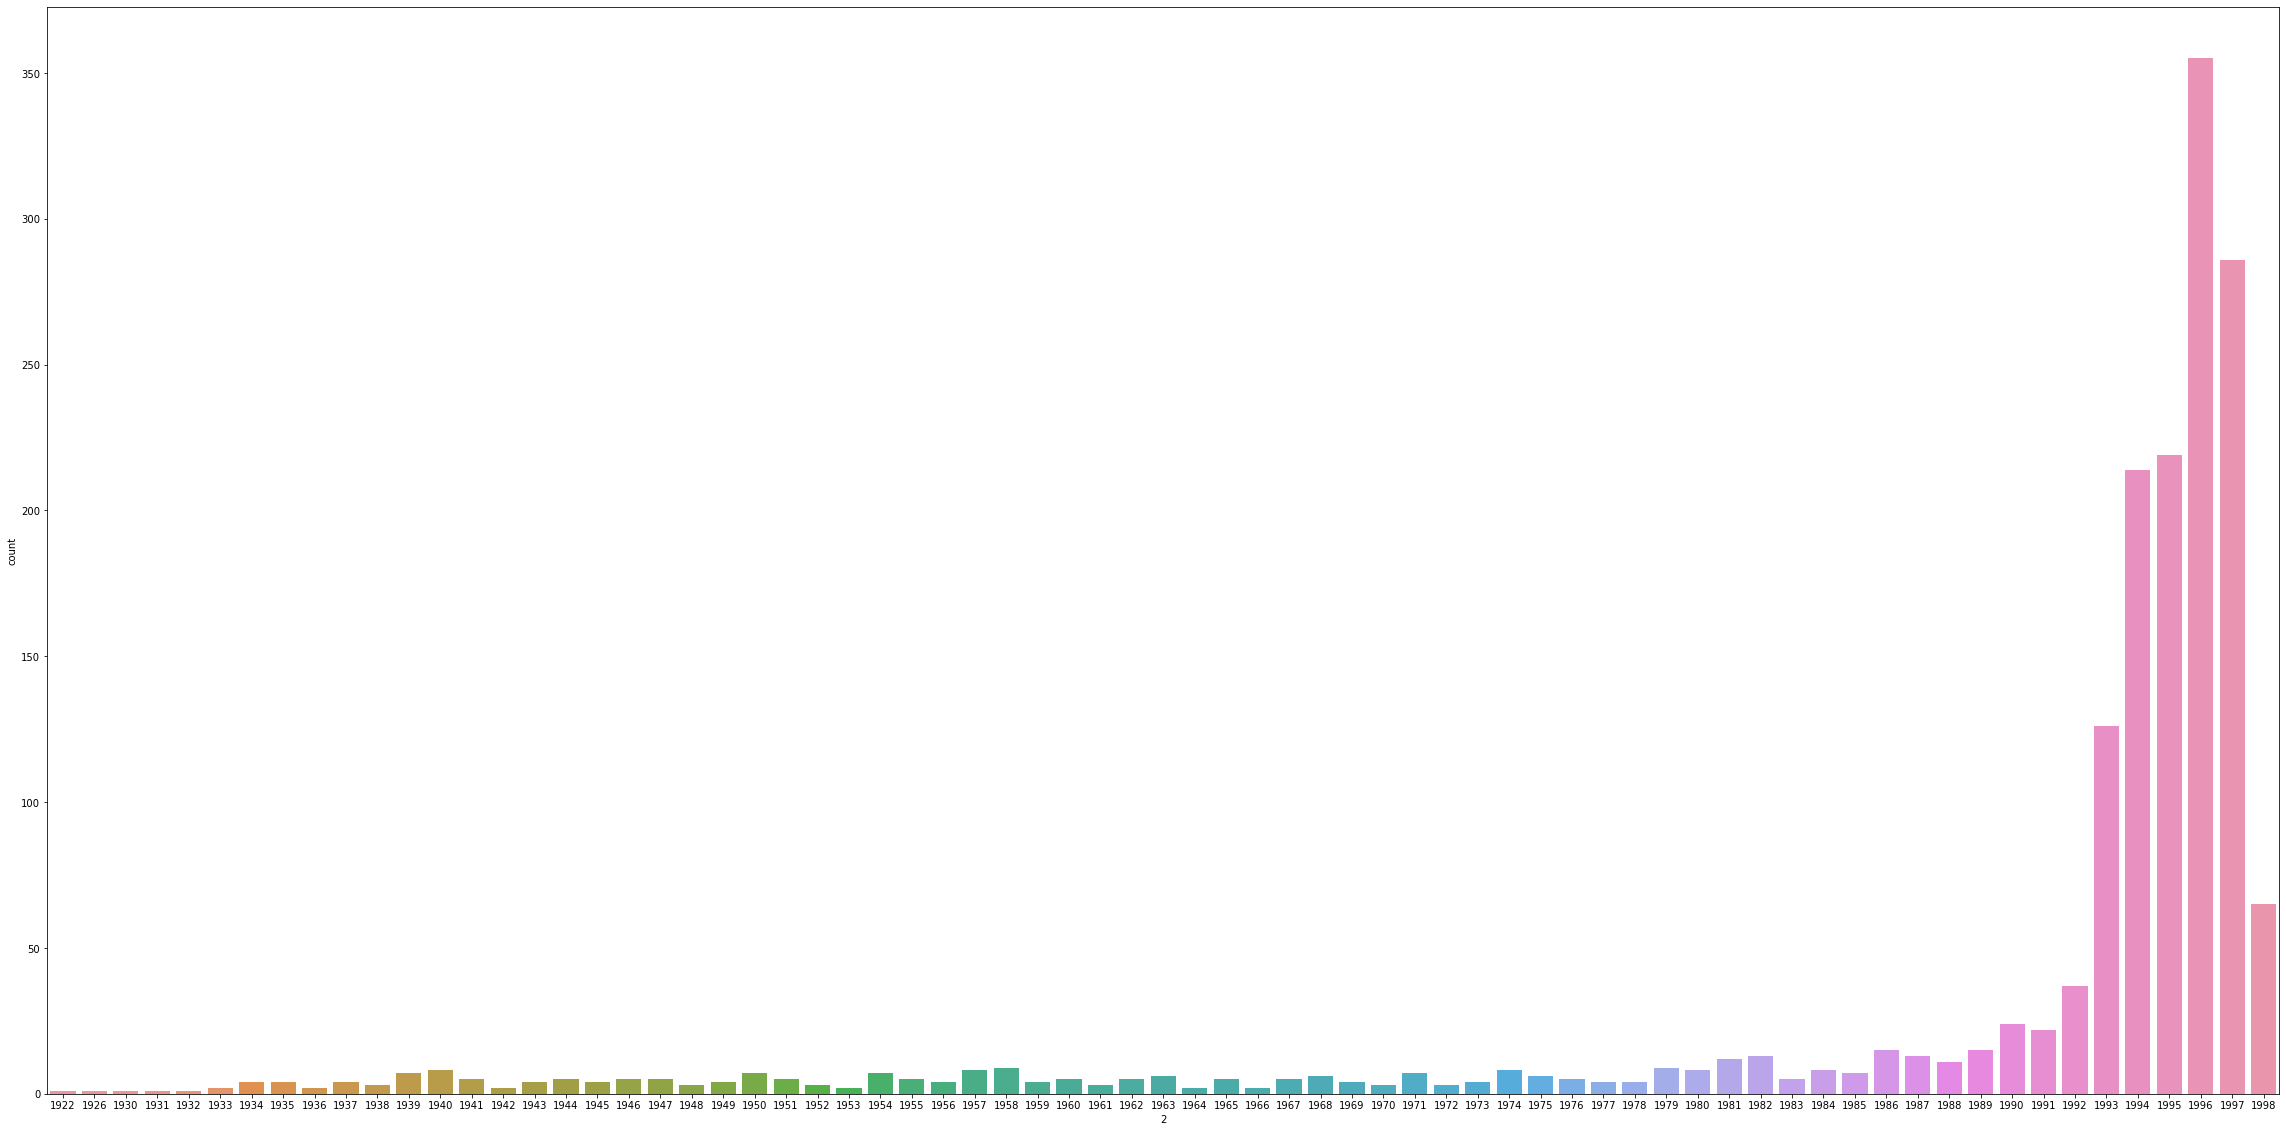

In [1183]:

# Option 1 using pd.DatetimeIndex 
#sns.countplot(pd.DatetimeIndex(Movie_Data['release date']).year) # Option 1 using Convert DataTimeIndex

# Option 2 using Split function, 
plt.figure(figsize=(40,20))
sns.countplot(Movie_Data['release date'].str.split("-", expand=True)[2])
#Imp: in Split expend=True is require to get the right Index value


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

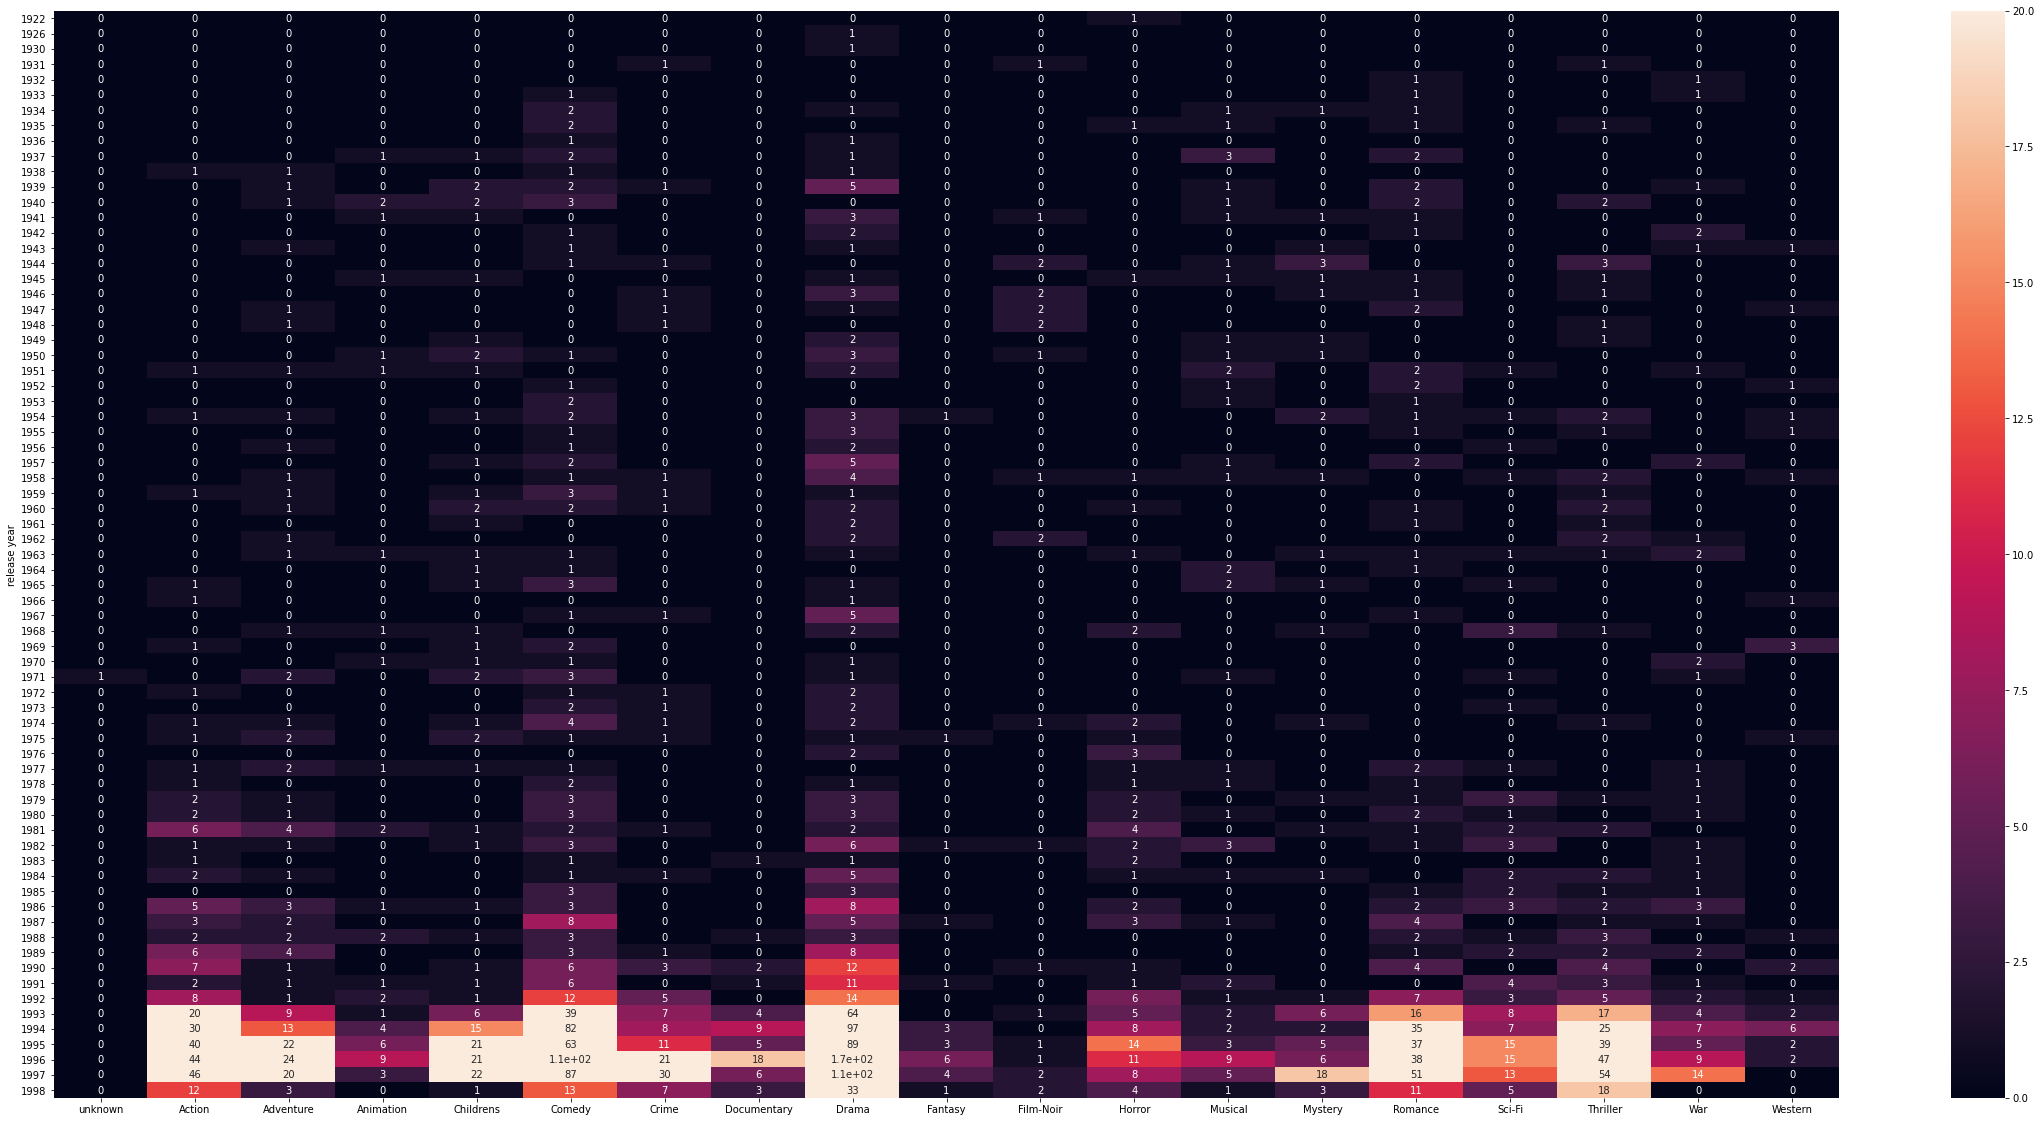

In [1219]:
#Your answer here
MovieData_Map  = Movie_Data
MovieData_Map['release year'] = pd.DatetimeIndex(MovieData_Map['release date']).year
#MovieData_Map["no of release"]= MovieData_Map.loc[:,'unknown':'Western'].sum(axis=1)
MovieData_Map=MovieData_Map.groupby(['release year']).sum()

MovieData_Map.drop('movie id',axis=1,inplace=True)
plt.figure(figsize=(40,20))
sns.heatmap(MovieData_Map,annot=True,vmin=0, vmax=20)
#sns.barplot(x = "release year",y = "no of release", data = MovieData1)




### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [1120]:
#your answer here
#merge one time to be use for mutiple 
#Option 1
Merge_UR_Movie_Data = pd.merge(UR_Data,Movie_Data)
#Movies_Size =Merge_UR_Movie_Data.groupby(['movie title','movie id'])['movie id'].count()>100
Movies_Size =Merge_UR_Movie_Data.groupby(['movie title','movie id']).agg({'rating':[np.size]})
List_MovieId_100R_1=List_MovieId_100R_1[Movies_Size['rating']['size'] >= 100]
Avg_RMovies = Merge_UR_Movie_Data.groupby(['movie title','movie id']).agg({'rating':[np.mean]}).sort_values([('rating', 'mean')], ascending=False)
Movies_Top25= pd.merge(List_MovieId_100R_1,Avg_RMovies,on='movie id').sort_values([('rating', 'mean')], ascending=False)[:25]

print(Movies_Top25)


#Option 2
Movies_Rated=Merge_UR_Movie_Data.groupby(['movie title','movie id']).agg({'rating':[np.size , np.mean]}).sort_values([('rating', 'mean')], ascending=False)
#print (Movies_Rated)
List_MovieId_100R_2=Movies_Rated['rating']['size'] >= 100
Movies_Rated[List_MovieId_100R_2].sort_values([('rating', 'mean')], ascending=False)[:25]


          size  (rating, mean)
movie id                      
408       True        4.491071
318       True        4.466443
169       True        4.466102
483       True        4.456790
64        True        4.445230
603       True        4.387560
12        True        4.385768
50        True        4.358491
178       True        4.344000
134       True        4.292929
427       True        4.292237
357       True        4.291667
98        True        4.289744
480       True        4.284916
127       True        4.283293
285       True        4.265432
272       True        4.262626
657       True        4.259542
474       True        4.252577
174       True        4.252381
479       True        4.251397
313       True        4.245714
511       True        4.231214
484       True        4.210145
172       True        4.204360


rating          
                                                              size      mean
movie title                                        movie id                 
Close Shave, A                                     408         112  4.491071
Schindler's List                                   318         298  4.466443
Wrong Trousers, The                                169         118  4.466102
Casablanca                                         483         243  4.456790
Shawshank Redemption, The                          64          283  4.445230
Rear Window                                        603         209  4.387560
Usual Suspects, The                                12          267  4.385768
Star Wars                                          50          583  4.358491
12 Angry Men                                       178         125  4.344000
Citizen Kane                                       134         198  4.292929
To Kill a Mockingbird                              427         219  4.292237
One Flew Over the Cuckoo's Nest                    357         264  4.291667
Silence of the Lambs, The                          98          390  4.289744
North by Northwest                                 480         179  4.284916
Godfather, The                                     127         413  4.283293
Secrets & Lies                                     285         162  4.265432
Good Will Hunting                                  272         198  4.262626
Manchurian Candidate, The                          657         131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry... 474         194  4.252577
Raiders of the Lost Ark                            174         420  4.252381
Vertigo                                            479         179  4.251397
Titanic                                            313         350  4.245714
Lawrence of Arabia                                 511         173  4.231214
Maltese Falcon, The                                484         138  4.210145
Empire Strikes Back, The                           172         367  4.204360

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [1195]:
#Merge_UR_Movie_Data.info()
Merge_All_Data=pd.merge(User_Data,Merge_UR_Movie_Data, on='user id') #merge with DataSet created in Q9 
Gender_Info=Merge_All_Data.groupby(['gender']).sum()
print((Gender_Info['Drama'] / Gender_Info['Drama'].sum())*100) #Men watch more drama than women
print((Gender_Info['Sci-Fi'] / Gender_Info['Sci-Fi'].sum())*100) #Women watch more Sci-Fi than men (Opposite)
print((Gender_Info['Romance'] / Gender_Info['Romance'].sum())*100) #Men watch more Romance than women
Gender_Info1= Gender_Info.iloc[:,5:] / Gender_Info.iloc[:,5:].sum()*100
Gender_Info1

gender
F    27.59243
M    72.40757
Name: Drama, dtype: float64
gender
F    20.652003
M    79.347997
Name: Sci-Fi, dtype: float64
gender
F    30.101228
M    69.898772
Name: Romance, dtype: float64


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,no of release
gender,,,,,,,,,,,,,,,,,,,,,
F,0.0,21.266951,22.838653,27.600555,31.077694,27.044784,22.271881,24.670185,27.59243,26.849112,...,22.512695,29.107792,25.052431,30.101228,20.652003,23.253475,23.29219,20.010787,25.74592,25.260836
M,100.0,78.733049,77.161347,72.399445,68.922306,72.955216,77.728119,75.329815,72.40757,73.150888,...,77.487305,70.892208,74.947569,69.898772,79.347997,76.746525,76.70781,79.989213,74.25408,74.739164


#### Conclusion:



# All three data set link to each other using user id and data for more number Male gender then Female. The genre popularity not changes drastically over the years however a greater number of movies release over the years. Also, a greater number of Student category watch movies.
